<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/Panorama_do_COVID_19_no_Brasil_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil e no Mundo

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://omunicipio.com.br/wp-content/uploads/2020/07/sjb-nova-trento-tem-mais-dois-casos-confirmados-de-covid-19-corona-1.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

> Os dados utilizados nesse notebook foram retirados do seguinte repositório do  [GitHub](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv), esses dados são atualizados constantemente por um *bot* mantendo assim os dados atuais. Espera-se um grande volume de dados presentes nesse DataSet além de que possam ser retirados *insights* sobre o cenário. 



> Existe a possibilidade de que alguns dados sejam conflitantes uma vez que as instancias federais, estaduais e não oficiais podem não entrar em acordo sobre as divulgações dos dados, assim gerando visões diferentes e talvez algumas inconsistencias. Aqui nesta análise vamos tentar ao maximo superar esses obstáculos e apresentar resultados conclusivos.

### Dicionário de Variáveis

> Nesta seção vamos apresentar as variaveis presentes no *DataSet* e uma breve descrição do que apresentam.

* `Continent`:
  * Continente ao qual o país pertence
* `Location`:
  * Localização geografica
* `Date`:
  * Data de Obsevação
* `total_case`:
  * Total de casos confirmados de COVID-19
* `new_cases`:
  * Novos casos confirmados de COVID-19
* `total_deaths`:
  * Total de mortes causadas por COVID-19
* `new_deaths`:
  * Novas mortes causadas por COVID-19
* `total_cases_per_million`:
  * Total de casos confirmados de COVID-19 por 1.000.000 de habitantes
* `new_cases_per_million`:
  * Novos casos confirmados de COVID-19 por 1.000.000 de habitantes
* `total_deaths_per_million`:
  * Mortes confirmadas de COVID-19 por 1.000.000 de habitantes
* `new_deaths_per_million`:
  * Novas mortes de COVID-19 confirmadas por 1.000.000 de habitantes
* `total_tests`:
  * Total de testes de COVID-19 realizados
* `new_tests`:
  * Novos testes de COVID-19
* `new_tests_smoothed`:
  * Para paises que não geram novos testes diariamente, utilizamos a media de testes dos ultimos 7 dias.
* `total_tests_per_thousand`:
  * Total de teste de COVID_19 por 1.000 habitantes
* `new_tests_per_thousand	`:
  * Novos teste de COVID-19 por 1.000 habitantes
* `new_tests_smoothed_per_thousand`:
  * Para paises que não geram novos testes diariamente, utilizamos a media de testes dos ultimos 7 dias. Aqui por 1.000 habitantes
* `test_units`:
  * Unidades utilizadas pela localidade para reportar os dados do teste.
* `stringency_index`:
  * Índice de restrição na localidade(de 0 a 100), quanto mais proximo de 100 maior rigor a quarentena possui, como por exemplo maior variedade de instituições(comerciais, educacionais, etc) fechadas.
* `population`:
  * população em 2020
* `population_density`:
  * Número de pessoas dividido pelo tamanho da pais, em Km², ano mais recente possível.
* `median_age`:
  * Idade mediana da população, previsão das nações unidas para 2020
* `aged_65_older`:
  * Quantidade de pessoas com 65 anos ou mais. Ano mais recente possível
* `aged_70_older`:
  * Quantidade de pessoas com 70 anos ou mais. Ano de 2015
* `gdp_per_capita`:
  * PIB do país, ano mais recente possível
* `extreme_poverty`:
  * Quantidade de pessoas que vivem na extrema pobreza, ano mais recente possível
* `cvd_death_rate	`:
  * Mortes por doenças cardiovasculares em 2017
* `diabetes_prevalence`:
  * Prevalência da diabete no ano de 2017 entre 20 e 79 anos.
* `female_smokers`:
  * Quantidade de mulheres fumantes
* `male_smokers`:
  * Quantidade de homens fumantes
* `handwashing_facilities`:
  * Parte da população que possui higiente basica ao seu alcance
* `hospital_beds_per_thousand`:
  * Quantidade de leitos por 1.000 habitantes no ano de 2010
* `life_expectancy`:
  * Expectativa de vida em 2019

---

### Importando os dados do COVID-19

 A partir de agora vamos dar ínico a nossa análise exploratoria, mas antes devemos importar os nossos dados. Como dito anteriormente vamos importar os dados a partir desse [repositório]((https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv)), caso queria acessa-lo basta clicar no link.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
# importar o dataset COVID-19 para um DataaFrame

df =  pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Análise Exploratória de dados(Visão mundial)

> Nesta etapa do projeto vamos visualizar e conhecer como estão dispostos nossos dados, de forma que possamos encontrar possíveis outliers que possam atrapalhar a nossa análise e também vamos em busca de cruzar informações que nos permitam maximar os nossos *insights*.

> Como primeiro ponto vamos ver uma amostra dos dados:

In [ ]:
# Cinco primeiras entradas de DF

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


> Vamos visualizar a quantidade de dados que estamos lidando:

In [ ]:
df.shape

(30011, 34)

>Podemos observar que esse é um *DataSet* que possui **29591 linhas/entradas** por **34 colunas/features**. Outro dado importante de ser analisado logo de ínicio são os tipos de variáveis que possuimos aqui, vamos averiguar:

In [ ]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

> Podemos obervar que temos 5 *features* do tipo `object` e 30 do tipo `float`. Um ponto interessante de se análisar é que a coluna `date` esta como `object` o que pode nos atrapalhar na hora de manipular a coluna. Para solucionar isso vamos transformala em tipo `date`.

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


> Observe que agora a coluna `date` é do tipo `date`. Vamos agora prosseguir com a nossa análise verificando a proporção de dados nulos que possuimos:

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

new_tests                          0.709373
new_tests_per_thousand             0.709373
total_tests_per_thousand           0.696111
total_tests                        0.696111
new_tests_smoothed_per_thousand    0.670154
new_tests_smoothed                 0.670154
tests_units                        0.646996
handwashing_facilities             0.590417
extreme_poverty                    0.403952
male_smokers                       0.289061
female_smokers                     0.280597
stringency_index                   0.197561
hospital_beds_per_thousand         0.177568
aged_65_older                      0.111492
gdp_per_capita                     0.109160
aged_70_older                      0.103229
median_age                         0.098597
cvd_death_rate                     0.097831
diabetes_prevalence                0.067975
population_density                 0.044317
life_expectancy                    0.013928
new_deaths_per_million             0.012495
total_deaths_per_million        

> Podemos observar que em algumas colunas temos mais de **70% das linhas** com valores ausentes, o que pode ser prejudicial para nossa análise. Dessa forma ao continuar a análise vamos tomar cuidado com esse ponto.

> Dando continuidade vamos olhar para os paises que possuem mais casos enumerados ate o momento:

In [ ]:
df_ordenado = df.loc[df.date == '2020-07-11'] 
df_ordenado = df_ordenado[['location','total_cases']].sort_values(by='total_cases', ascending = False)[1:11].copy()
df_ordenado.reset_index(drop='index',inplace=True)
df_ordenado.head(10)

,location,total_cases
0,United States,3184633.0
1,Brazil,1800827.0
2,India,820916.0
3,Russia,713936.0
4,Peru,319646.0
5,Chile,309274.0
6,Mexico,289174.0
7,United Kingdom,288133.0
8,Spain,253908.0
9,Iran,252720.0


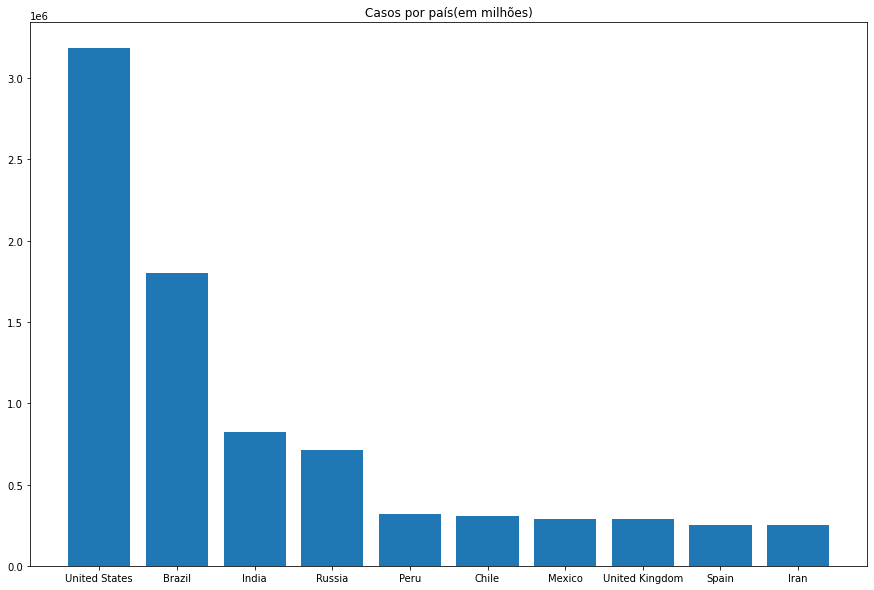

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location','total_cases', data=df_ordenado.head(10))
ax.set_title("Casos por país(em milhões)")
sns.set_style('darkgrid')

In [ ]:
df_ordenado2 = df.loc[df.date == '2020-07-11'] 
df_ordenado2 = df_ordenado2[['location','total_deaths']].sort_values(by='total_deaths', ascending = False)[1:11].copy()
df_ordenado2.reset_index(drop='index',inplace=True)
df_ordenado2.head(10)

,location,total_deaths
0,United States,134097.0
1,Brazil,70398.0
2,United Kingdom,44650.0
3,Italy,34938.0
4,Mexico,34191.0
5,France,30004.0
6,Spain,28403.0
7,India,22123.0
8,Iran,12447.0
9,Peru,11500.0


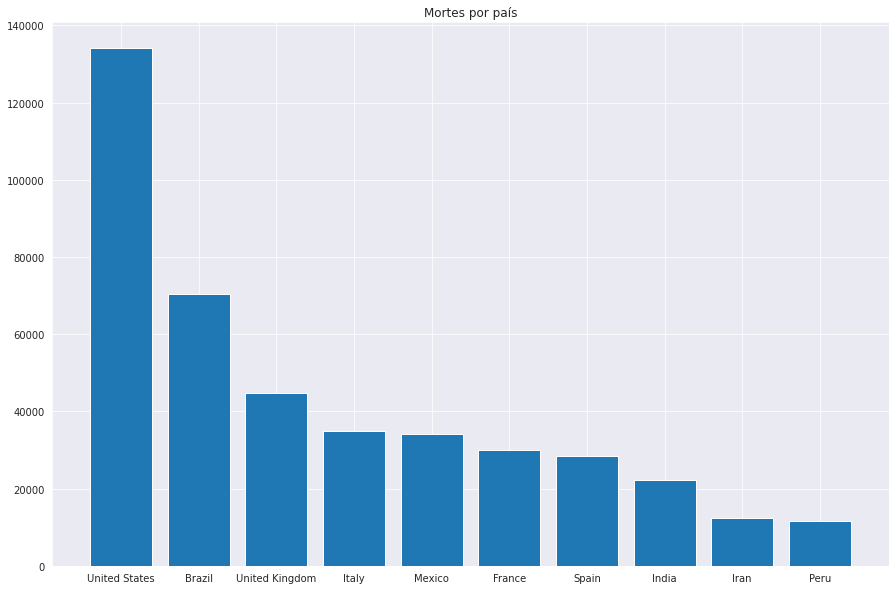

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location','total_deaths', data=df_ordenado2.head(10))
ax.set_title("Mortes por país")
sns.set_style('darkgrid')

> Observamos que na primeira tabela que se atenta ao número de casos por país que **Estados Unidos, Brasil e India** lideram o top 10 respectivamente. Já na segunda tabela que diz respeito ao número de mortes por pais vemos que **Estados Unidos, Brasil e Reino Unido** lideram o top 10. Porém será que a situação é mais grave nesses paises? Para isso vamos cruzar alguns dados e olhar a proporção de casos/mortes com a população total 

In [ ]:
df_prop1= df.loc[df.date == '2020-07-11'] 
lugares = list (df_prop1['location'].copy())
dados = list ((df_prop1['total_cases']/df_prop1['population'])*100)
info = {
    'local':lugares,
    'casos/população':dados
}
df2 = pd.DataFrame(data = info)
df2.sort_values(by='casos/população',ascending=False).reset_index(drop='index').head(13)

,local,casos/população
0,Qatar,3.562231
1,San Marino,2.103836
2,Bahrain,1.882894
3,Chile,1.617863
4,Vatican,1.483313
5,Kuwait,1.254636
6,Andorra,1.106581
7,Oman,1.049892
8,Armenia,1.042881
9,Panama,1.002534


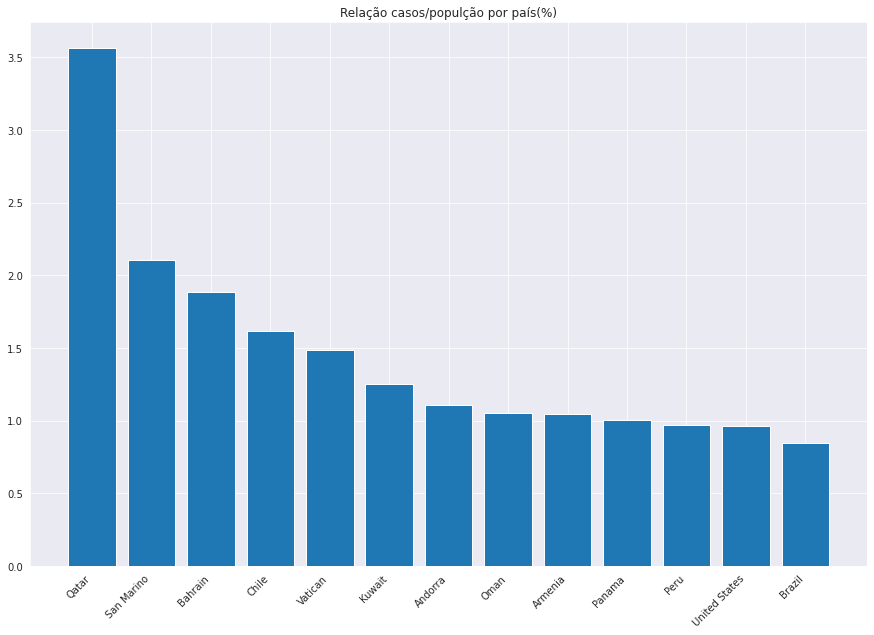

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar('local','casos/população', data=df2.sort_values(by='casos/população',ascending=False).reset_index(drop='index').head(13))
ax.set_title("Relação casos/populção por país(%)")
plt.xticks(rotation=45 , ha='right')
sns.set_style('darkgrid')


> Se tratando de proporcionalidade a situação mais preocupante quanto ao número de casos é representada pelo **Qatar** no qual **3,56%** de sua população esta infectada com o virus. Nesse ranking o **Brasil** ocupa a **13º colocação com 0.84%** da populaçaõ infectada, levando em consideração o número de pessoas infectadas em relação a população total.

In [ ]:
df_prop1= df.loc[df.date == '2020-07-11'] 
lugares = list (df_prop1['location'].copy())
dados = list ((df_prop1['total_deaths']/df_prop1['population'])*100)
info = {
    'local':lugares,
    'mortes/população':dados
}
df3 = pd.DataFrame(data = info)
df3.sort_values(by='mortes/população',ascending=False).reset_index(drop='index',).head(14)

,local,mortes/população
0,San Marino,0.123755
1,Belgium,0.084403
2,Andorra,0.067301
3,United Kingdom,0.065772
4,Spain,0.060749
5,Italy,0.057785
6,Sweden,0.054717
7,France,0.045967
8,United States,0.040512
9,Netherlands,0.035757


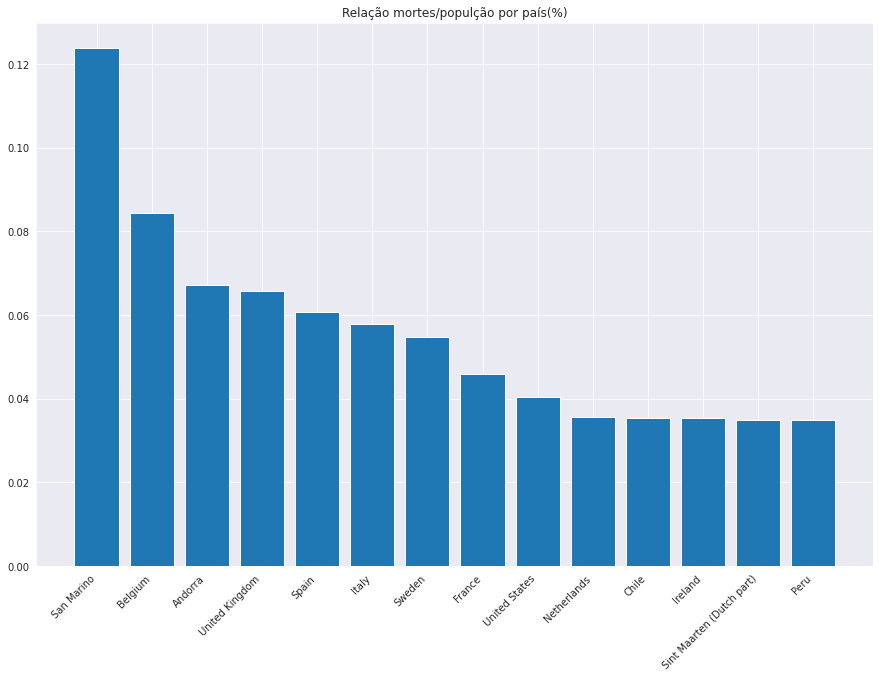

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar('local','mortes/população', data=df3.sort_values(by='mortes/população',ascending=False).reset_index(drop='index').head(14))
ax.set_title("Relação mortes/populção por país(%)")
plt.xticks(rotation=45 , ha='right')
sns.set_style('darkgrid')


> Se tratando de proporcionalidade a situação mais preocupante quanto ao número de casos é representado por **San Marino** no qual **0,12%** de sua população foi morta pelo vírus. Nesse ranking o **Brasil** ocupa a **14º colocação com 0.033%** da populaçaõ morta pelo vírus, levando em consideração o número de pessoas infectadas em relação a população total. Olhando por esses números nossa situação não é tão ruin.

>Porém isso é assunto para outra seção, onde vamos análisar exclusivamente o brasil. Vamos seguir com a análise Mundial. Vamos olhar agora para como anda a curva de casos no mundo.

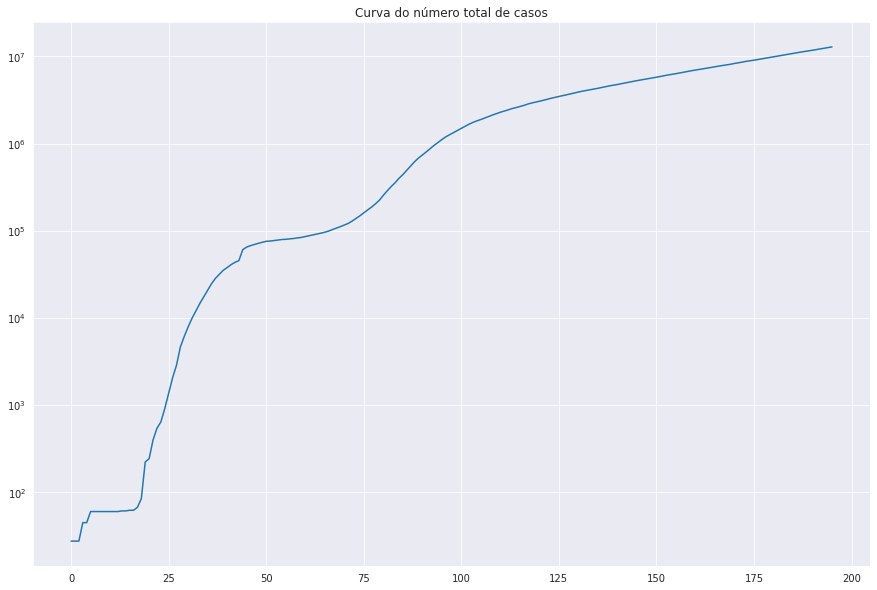

In [ ]:
df.loc[df.location == "World", "total_cases"].reset_index(drop=True).plot(figsize=(15,10));
plt.yscale('log')
plt.title("Curva do número total de casos")    
sns.set_style('darkgrid')

> Olhando para a curva logaritmica acima vemos que estamos caminhando para uma estabilidade no número de casos, pórem a tendência é que o número de casos continuem aumentando. 

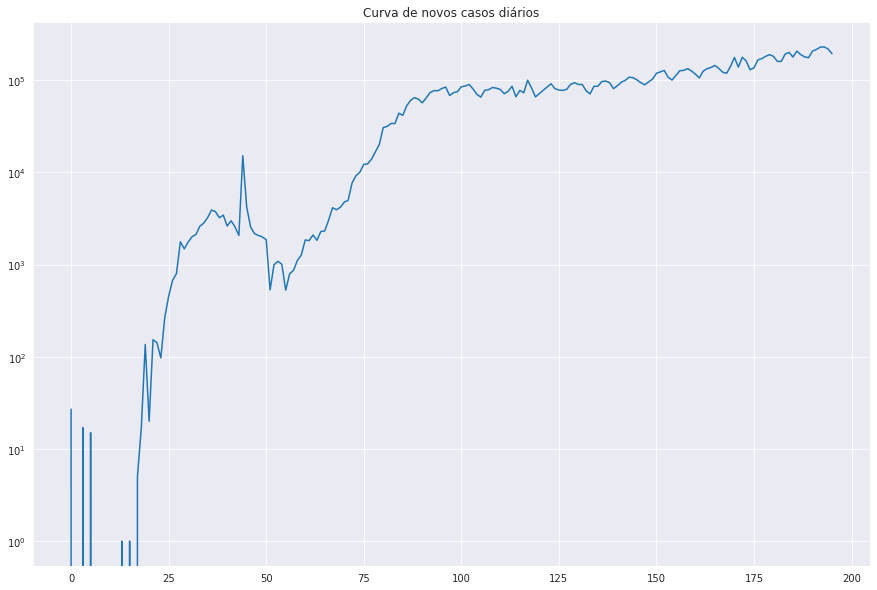

In [ ]:
df.loc[df.location == "World", "new_cases"].reset_index(drop=True).plot(figsize=(15,10));
plt.yscale('log')
plt.title("Curva de novos casos diários")    
sns.set_style('darkgrid')

> Olhando para a curva acima vemos como estão o número de novos casos mundialmente. Podemos perceber que ainda não alcançamos o ponto máximo , ou seja, a quantidade de casos ainda tende aumentar nos próximos dias.

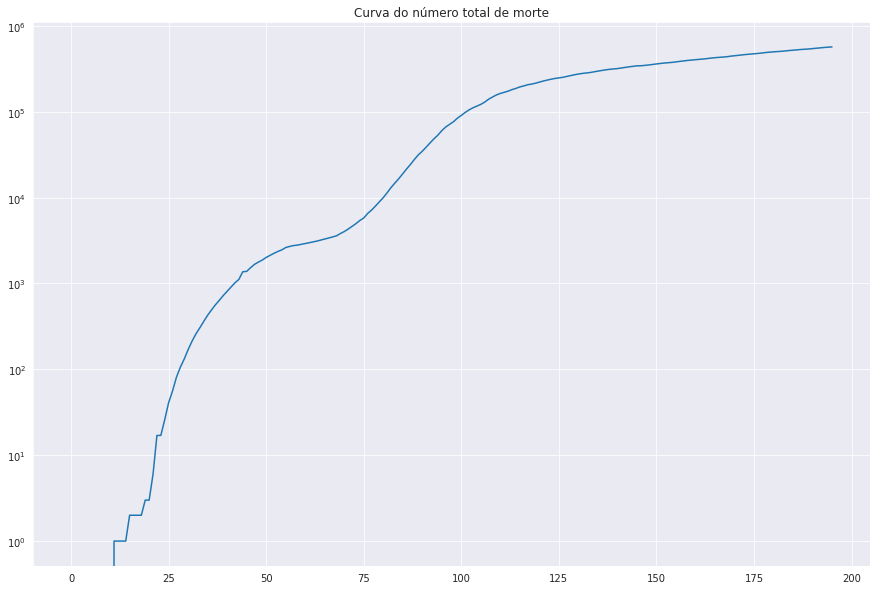

In [ ]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(15,10));
plt.yscale('log')
plt.title("Curva do número total de morte")    
sns.set_style('darkgrid')

> Podemos observar que ja existe uma certa tendência na curva logaritmica acima para a estabilidade no número de mortes, o que indica que o número de novas mortes pode estar se estabilizando. Vamo verificar o gráfico diário para ver se hipótese se confirma.

> 

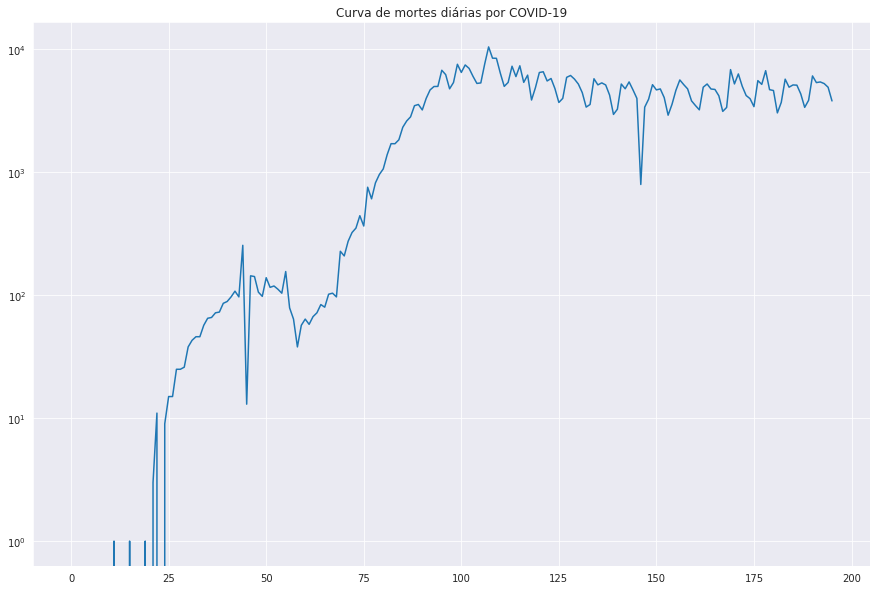

In [ ]:
df.loc[df.location == "World", "new_deaths"].reset_index(drop=True).plot(figsize=(15,10));
plt.yscale('log')
plt.title("Curva de mortes diárias por COVID-19")    
sns.set_style('darkgrid')

> Podemos ver que existe uma grande variação no gráfico, porém e analisarmos a sua tendência vemos que é continuar estável. Podemos dizer que o número de mortes por dia causadas por COVID-19 não irá disparar novamente, uma vez que existe aproximadamente 100 dias de estabilidade no número.

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

### Análise exploratória(BRASIL)

> Nesta seção vamos continuar com as analises porém vamos partir para o cenário nacional, em busca de identificar insights e classificar a situação do nosso pais.

In [ ]:
df_brasil = df.loc[df.location == "Brazil"].copy()

> Como primeiro passo vamos identificar qual foi o primeiro caso de COVID-19 no Brasil e quando o ocorreu:

In [ ]:
df_brasil[(df_brasil['total_cases']==1) & (df_brasil['new_cases']==1)]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3910,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


> Podemos obsevar que o primeiro caso de COVID-19 no Brasil foi registrado no dia 26 de fevereiro de 2020. Vamos agora observar quantos dias se passaram até o registro da primeira morte:



In [ ]:
df_brasil[(df_brasil['total_deaths']==1) & (df_brasil['new_deaths']==1)]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3931,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


> Veja que desde o dia que foi resgitrado o primeiro caso de COVID-19, decorreram 21 dias até que fosse registrada a primeira morte por corona no Brasil no dia 18 de março de 2020. Vamos agora olhar para o desenvolvimento da pandemia no país:

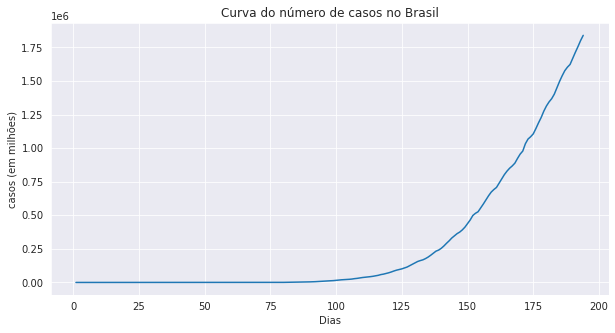

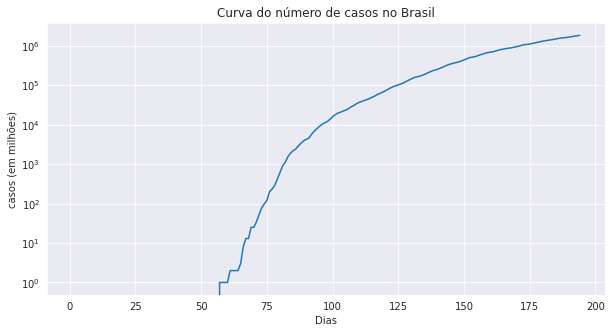

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Curva do número de casos no Brasil')
ax.set_xlabel('Dias')
ax.set_ylabel('casos (em milhões)')
ax.plot(range(1,195),df_brasil['total_cases'][1:-1]);

fig, ax2 = plt.subplots(figsize=(10,5))

ax2.set_title('Curva do número de casos no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('casos (em milhões)')
ax2.set_yscale('log')
ax2.plot(range(1,195),df_brasil['total_cases'][1:-1]);

> Podemos ver que o desenvolvimento da doença no cenário nacional acompanha o cenário mundial no quesito número de casos totais. Vemos que a curva ainda esta subindo e não alcançou seu ponto maximo. Dessa maneira deve haver um número maior de casos nos proximos dias. Vamos agora analisar o número de mortes:

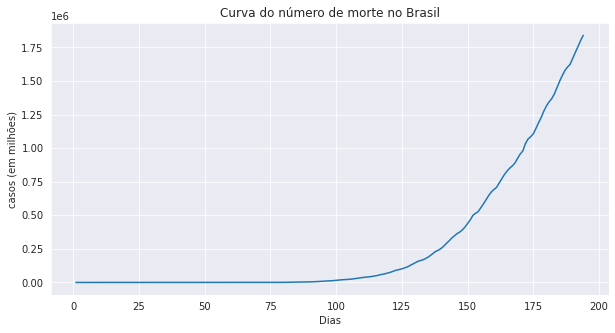

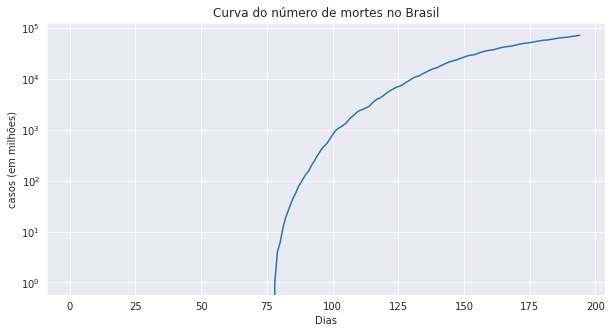

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Curva do número de morte no Brasil')
ax.set_xlabel('Dias')
ax.set_ylabel('casos (em milhões)')
ax.plot(range(1,195),df_brasil['total_cases'][1:-1]);

fig, ax2 = plt.subplots(figsize=(10,5))

ax2.set_title('Curva do número de mortes no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('casos (em milhões)')
ax2.set_yscale('log')
ax2.plot(range(1,195),df_brasil['total_deaths'][1:-1]);

> Aqui podemos observar um comportamento diferente no Brasil quando o comparamos ao cenário mundial. Podemos ver que as curvas que dizem respeito ao número total de mortos ainda continuam a subir de tal forma que ainda teremos o número de mortes subindo dia após dia.

## Conclusão

É importante ressaltar que esse conjunto de dados irá estar desatualizado em um periódo muito curto de tempo, porém pudemos observar que:

+ Estados Unidos e Brasil lideram os ranks de mortes e casos.
+ No cenário mundial o número de casos ainda não alcançou seu pico, ainda continua a aumentar.
+ No cenário mundial o número de novas mortes se estabilizou e sua tendência é continuar estabilizado. Porém o número de mortos ainda continua a subir.
+ No Brasil o número de casos ainda continua a subir de forma descontrolada, e o número de mortes também tem aumentado.
+ Tendo os pontos acima em vista podemos dizer que a pandemia relacionada ao COVID-19 ainda não atingiu o pico da curva, dessa forma ainda esta longe de acabar.